In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def gd(X, y, alpha, epsilon=10**(-6)):
    beta = np.zeros(len(X[0, :]))
    beta_arr = [beta]
    
    f = (y - X @ beta).T @ (y - X @ beta)
    f_arr = [f]
    
    gradient_f = -2*(X.T @ (y - X @ beta))
    gradient_arr = [gradient_f]
    
    # while np.linalg.norm(beta - beta_real) > epsilon:
    while np.linalg.norm(gradient_f) > epsilon:
        beta = beta + 2 * alpha * (X.T @ (y - X @ beta))
        beta_arr.append(beta)
        
        gradient_f = -2*(X.T @ (y - X @ beta))
        gradient_arr.append(gradient_f)
        
        f = (y - X @ beta).T @ (y - X @ beta)
        f_arr.append(f)
        
    return beta, beta_arr, f_arr, gradient_arr

In [81]:
df = pd.read_csv(r"C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\mortality.csv", index_col=0)
df

,Mortality,JanTemp,JulyTemp,RelHum,Rain,Educ,Dens,NonWhite,WhiteCollar,Pop,House,Income,HC,NOx,SO2
City,,,,,,,,,,,,,,,
"Akron, OH",921.87,27,71,59,36,11.4,3243,8.8,42.6,660328,3.34,29560,21,15,59
"Albany-Schenectady-Troy, NY",997.87,23,72,57,35,11.0,4281,3.5,50.7,835880,3.14,31458,8,10,39
"Allentown, Bethlehem,PA-NJ",962.35,29,74,54,44,9.8,4260,0.8,39.4,635481,3.21,31856,6,6,33
"Atlanta, GA",982.29,45,79,56,47,11.1,3125,27.1,50.2,2138231,3.41,32452,18,8,24
"Baltimore, MD",1071.29,35,77,55,43,9.6,6441,24.4,43.7,2199531,3.44,32368,43,38,206
"Birmingham, AL",1030.38,45,80,54,53,10.2,3325,38.5,43.1,883946,3.45,27835,30,32,72
"Boston, MA",934.70,30,74,56,43,12.1,4679,3.5,49.2,2805911,3.23,36644,21,32,62
"Bridgeport-Milford, CT",899.53,30,73,56,45,10.6,2140,5.3,40.4,438557,3.29,47258,6,4,4
"Buffalo, NY",1001.90,24,70,61,36,10.5,6582,8.1,42.5,1015472,3.31,31248,18,12,37


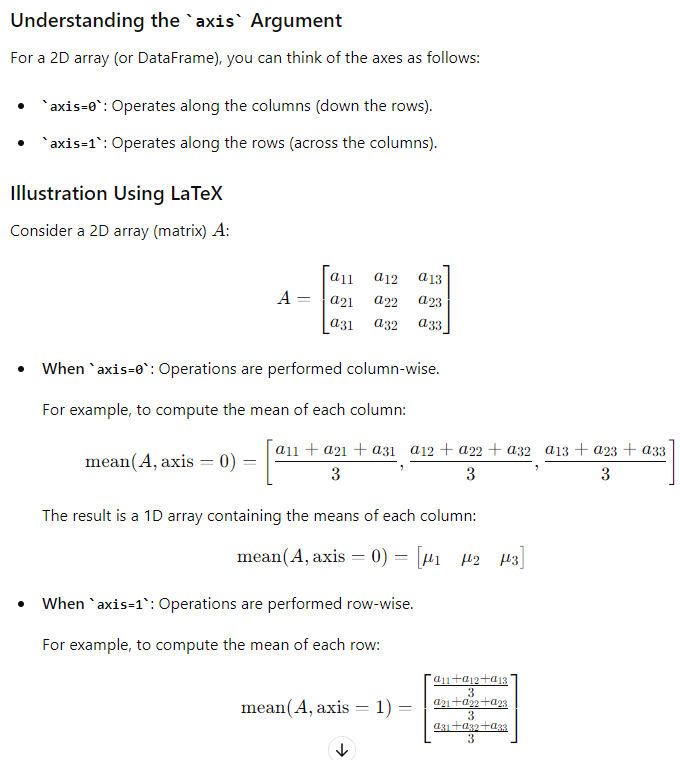

In [82]:
y = np.array(df.loc[:, "Mortality"])
X = np.array(df.iloc[:, 1:])

normalized_y = (y -y.mean()) / y.std()
normalized_X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add intercept to normalized X
intercept = np.ones((normalized_X.shape[0], 1))
X_with_intercept = np.hstack((intercept, normalized_X))

In [83]:
beta, beta_arr, f_arr, gradient_arr = gd(X_with_intercept, normalized_y, alpha=0.00001)

# Set print options to display floats in fixed-point notation
np.set_printoptions(suppress=False, precision=14)

beta.round(4).tolist()

[-0.0,
 -0.2344,
 -0.2175,
 0.0117,
 0.1798,
 -0.1505,
 0.1089,
 0.7643,
 -0.1212,
 0.084,
 -0.1115,
 -0.0305,
 -0.9962,
 0.881,
 0.0861]

In [84]:
np.array(gradient_arr)

array([[-6.30606677987089e-14,  1.88229643698450e+00,
        -3.79757010833879e+01, ...,  2.18142347817714e+01,
         9.97904967027016e+00, -4.94559399157966e+01],
       [-6.37268016134840e-14,  1.87823111546150e+00,
        -3.77935984836570e+01, ...,  2.16874885163343e+01,
         9.87795299096660e+00, -4.93710577469346e+01],
       [-6.12843109593086e-14,  1.87427415039464e+00,
        -3.76122342405132e+01, ...,  2.15614395800158e+01,
         9.77747973226968e+00, -4.92862617081293e+01],
       ...,
       [ 4.44089209850063e-16, -6.75321221166314e-09,
         3.46515494076272e-09, ...,  6.98952799860209e-07,
        -7.06890953994233e-07,  1.00837692418310e-07],
       [-4.44089209850063e-16, -6.75316358389466e-09,
         3.46514084093030e-09, ...,  6.98947965949159e-07,
        -7.06886087553649e-07,  1.00836995975406e-07],
       [-2.22044604925031e-15, -6.75311739861684e-09,
         3.46512107896046e-09, ...,  6.98943144361586e-07,
        -7.06881210121857e-07,  1.0

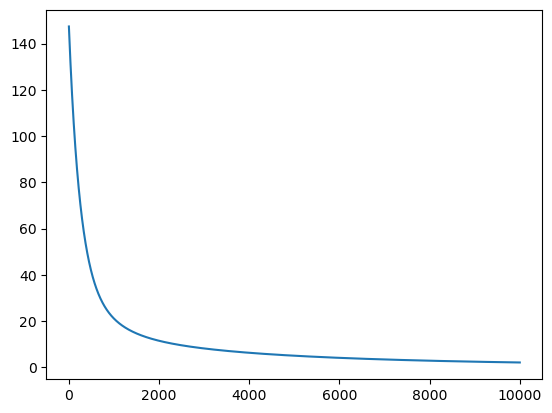

In [90]:
norm_arr = (np.linalg.norm(np.array(gradient_arr), axis=1))
plt.plot(norm_arr[:10000])

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv(r'C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\mortality.csv', index_col=0)

# Prepare the data
y = np.array(df.loc[:, "Mortality"])
X = np.array(df.iloc[:, 1:])

# Normalize X
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

# Normalize y
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Add intercept to normalized X
intercept = np.ones((X_normalized.shape[0], 1))
X_with_intercept = np.hstack((intercept, X_normalized))

def gd(X, y, alpha, epsilon=1e-6, max_iterations=10000):
    beta = np.zeros(X.shape[1])
    beta_arr = [beta]
    
    f = (y - X @ beta).T @ (y - X @ beta)
    f_arr = [f]
    
    gradient_f = -2*(X.T @ (y - X @ beta))
    gradient_arr = [gradient_f]
    
    iterations = 0
    while np.linalg.norm(gradient_f) > epsilon and iterations < max_iterations:
        beta = beta + 2 * alpha * (X.T @ (y - X @ beta))
        beta_arr.append(beta)
        
        gradient_f = -2*(X.T @ (y - X @ beta))
        gradient_arr.append(gradient_f)
        
        f = (y - X @ beta).T @ (y - X @ beta)
        f_arr.append(f)
        
        iterations += 1
        
        # Print progress
        if iterations % 100 == 0:
            print(f"Iteration {iterations}: f = {f}, norm(gradient_f) = {np.linalg.norm(gradient_f)}")
        
    return beta, beta_arr, f_arr, gradient_arr

# Perform gradient descent with a suitable learning rate
beta, beta_arr, f_arr, gradient_arr = gd(X_with_intercept, y_normalized, alpha=0.0001)

# Output the final beta values
print("Final beta values:")
print(beta.round(4).tolist())


Iteration 100: f = 19.30375139624642, norm(gradient_f) = 20.899402508067308
Iteration 200: f = 16.957449846596177, norm(gradient_f) = 11.414388254513643
Iteration 300: f = 16.032064371629303, norm(gradient_f) = 8.107123257576129
Iteration 400: f = 15.52372114986429, norm(gradient_f) = 6.240520982417929
Iteration 500: f = 15.21158609600137, norm(gradient_f) = 4.975005842990549
Iteration 600: f = 15.008924766919574, norm(gradient_f) = 4.053514411139518
Iteration 700: f = 14.872233350667072, norm(gradient_f) = 3.357280498815743
Iteration 800: f = 14.777248857974145, norm(gradient_f) = 2.8181274503939617
Iteration 900: f = 14.709570290796492, norm(gradient_f) = 2.3933821976319285
Iteration 1000: f = 14.660246283095438, norm(gradient_f) = 2.055019014674579
Iteration 1100: f = 14.623507138815137, norm(gradient_f) = 1.7838403835752692
Iteration 1200: f = 14.595527221401733, norm(gradient_f) = 1.5661181455458562
Iteration 1300: f = 14.573714476793786, norm(gradient_f) = 1.3915948502090396
Iter

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv(r'C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\mortality.csv', index_col=0)

# Prepare the data
y = np.array(df.loc[:, "Mortality"])
X = np.array(df.iloc[:, 1:])

# Normalize X
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

# Normalize y
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Add intercept to normalized X
intercept = np.ones((X_normalized.shape[0], 1))
X_with_intercept = np.hstack((intercept, X_normalized))

def gd(X, y, alpha, epsilon=1e-6, max_iterations=100000000):
    beta = np.zeros(X.shape[1])
    beta_arr = [beta]
    
    f = (y - X @ beta).T @ (y - X @ beta)
    f_arr = [f]
    
    gradient_f = -2*(X.T @ (y - X @ beta))
    gradient_arr = [gradient_f]
    
    iterations = 0
    while np.linalg.norm(gradient_f) > epsilon and iterations < max_iterations:
        beta = beta + 2 * alpha * (X.T @ (y - X @ beta))
        beta_arr.append(beta)
        
        gradient_f = -2*(X.T @ (y - X @ beta))
        gradient_arr.append(gradient_f)
        
        f = (y - X @ beta).T @ (y - X @ beta)
        f_arr.append(f)
        
        iterations += 1
        
    return beta, beta_arr, f_arr, gradient_arr

# Perform gradient descent with a suitable learning rate
beta, beta_arr, f_arr, gradient_arr = gd(X_with_intercept, y_normalized, alpha=0.00001)

beta.round(4).tolist()


[-0.0,
 -0.2344,
 -0.2175,
 0.0117,
 0.1798,
 -0.1505,
 0.1089,
 0.7643,
 -0.1212,
 0.084,
 -0.1115,
 -0.0305,
 -0.9962,
 0.881,
 0.0861]

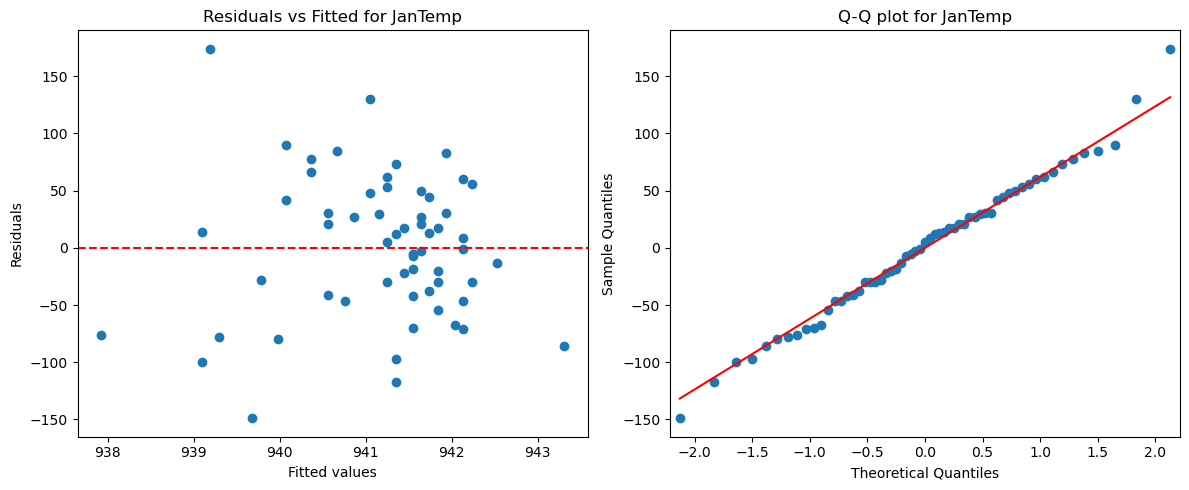

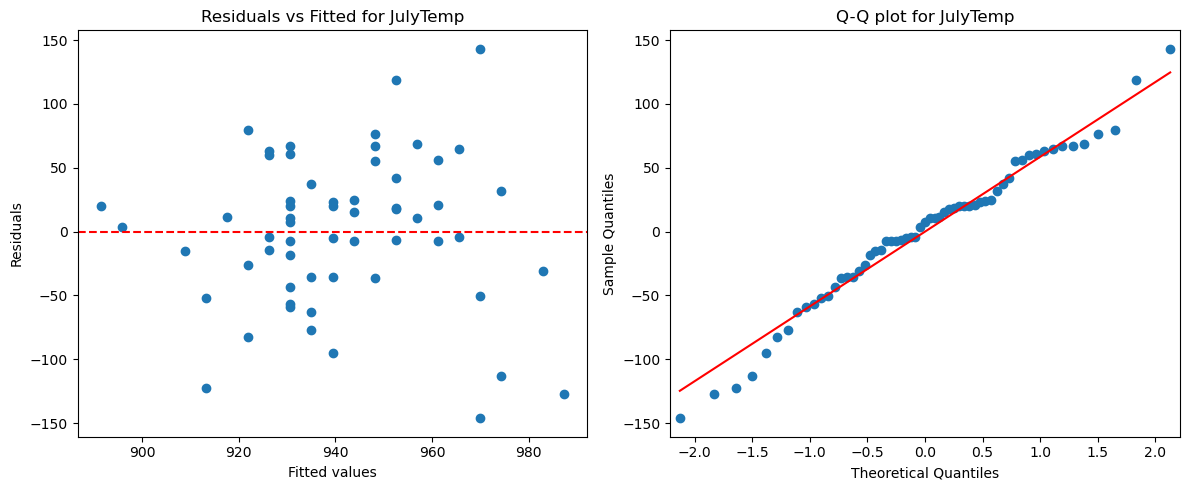

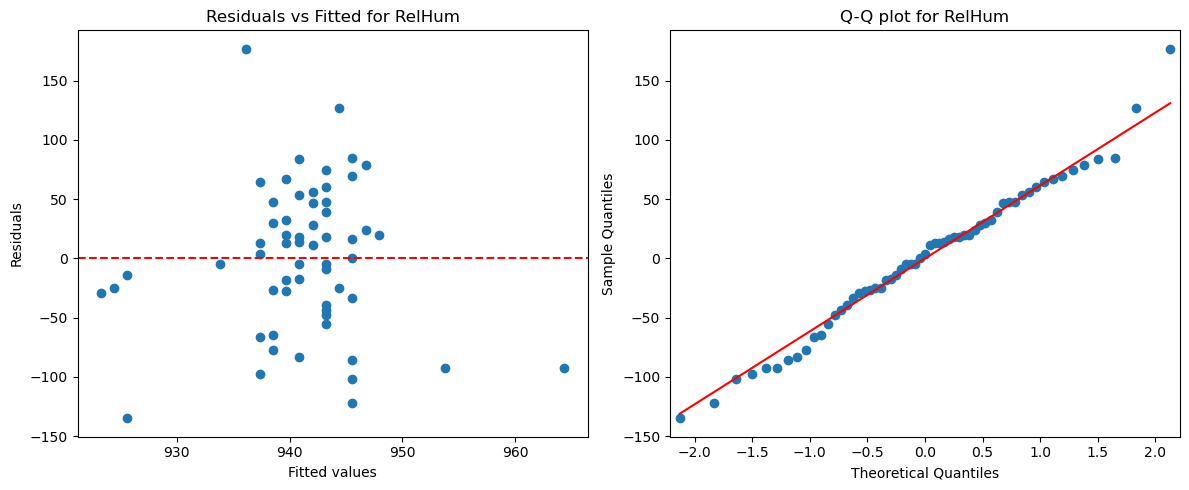

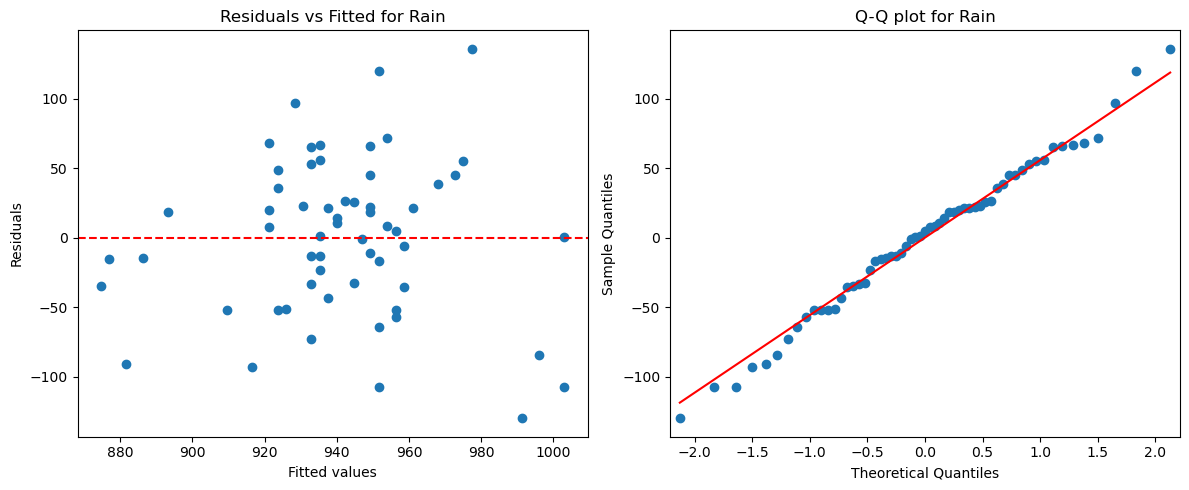

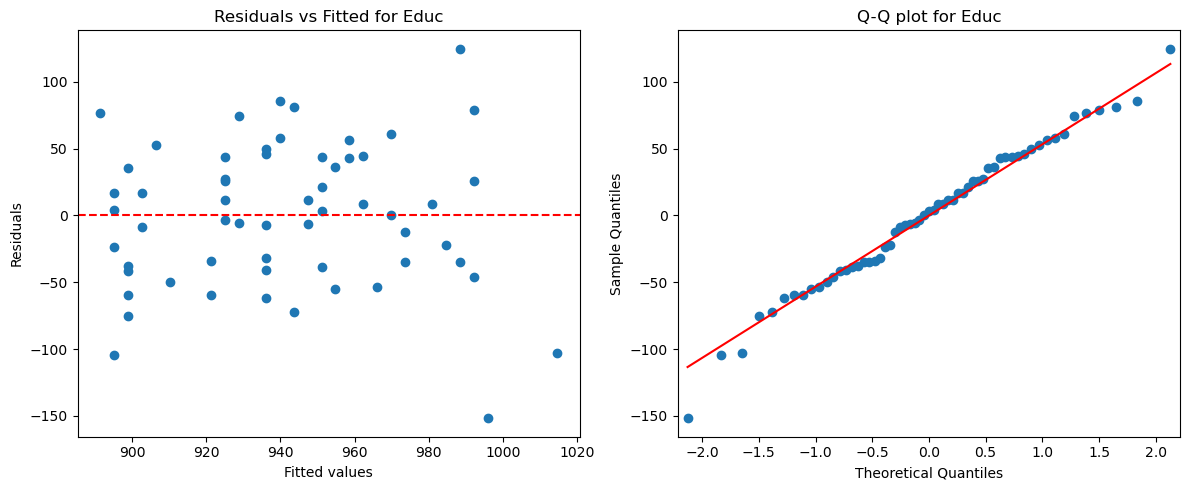

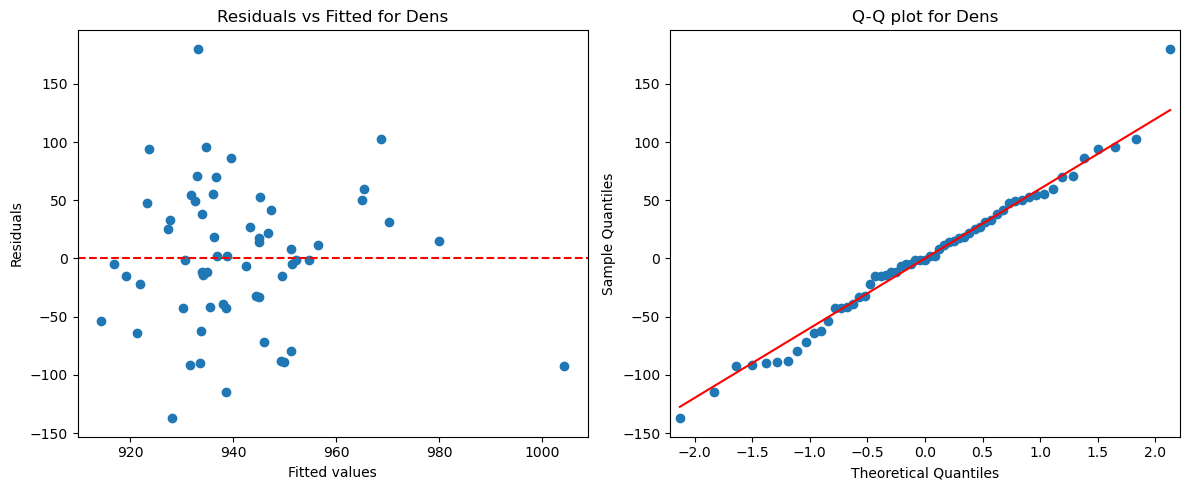

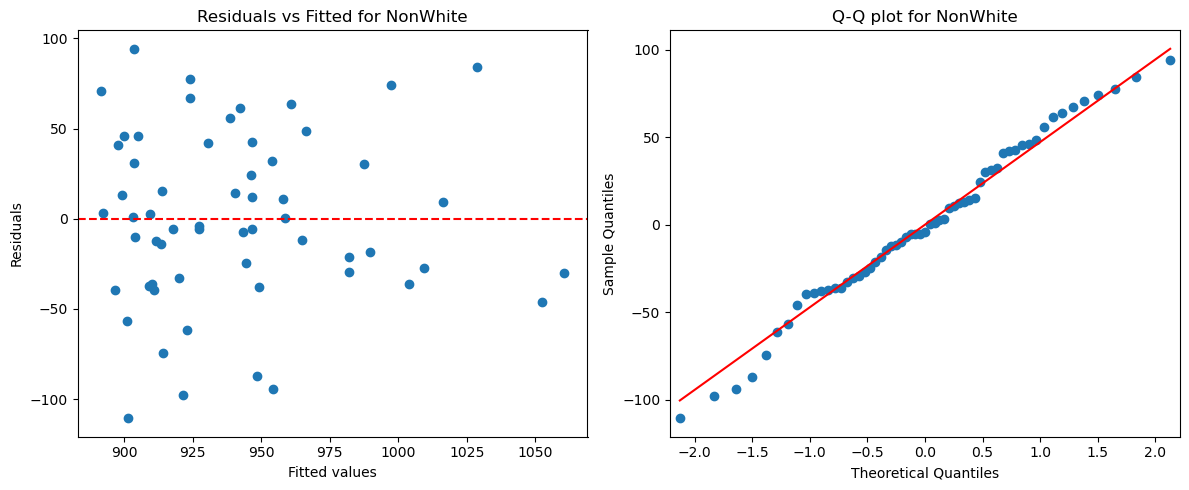

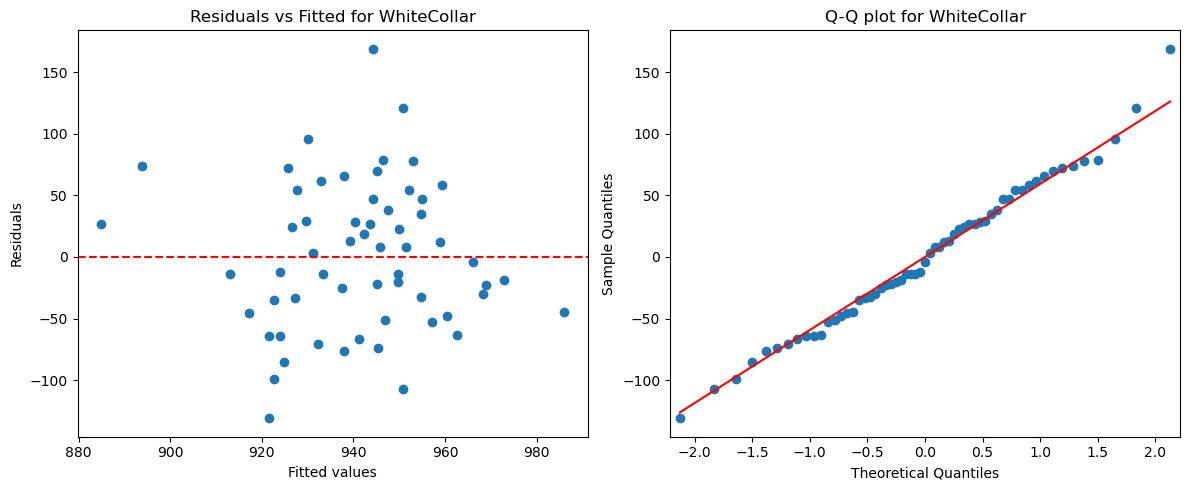

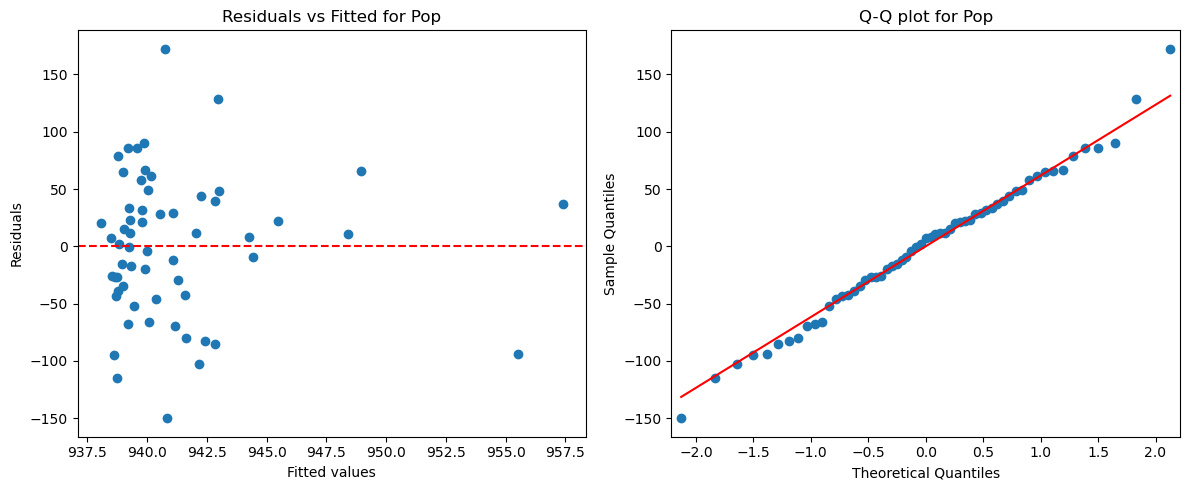

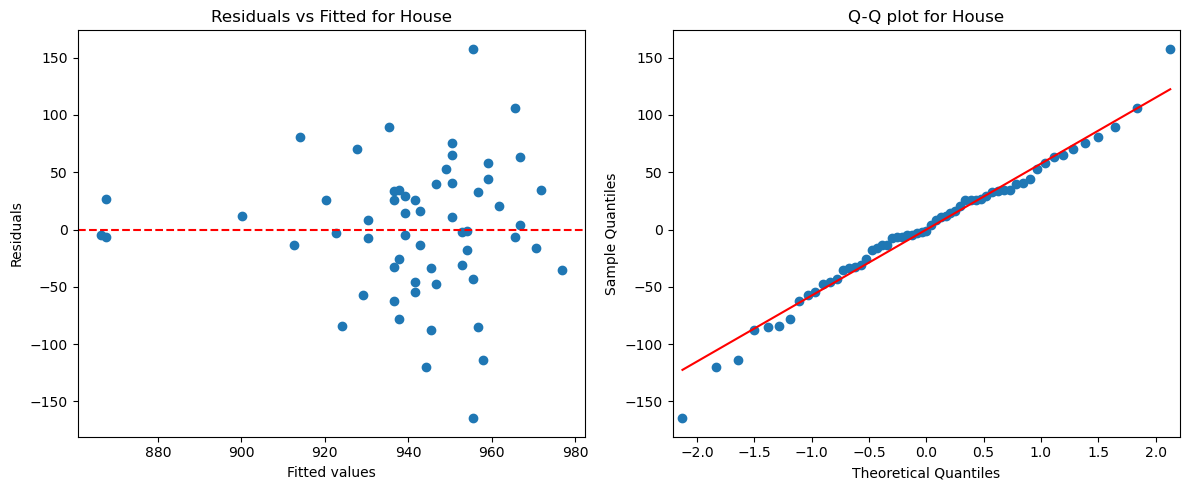

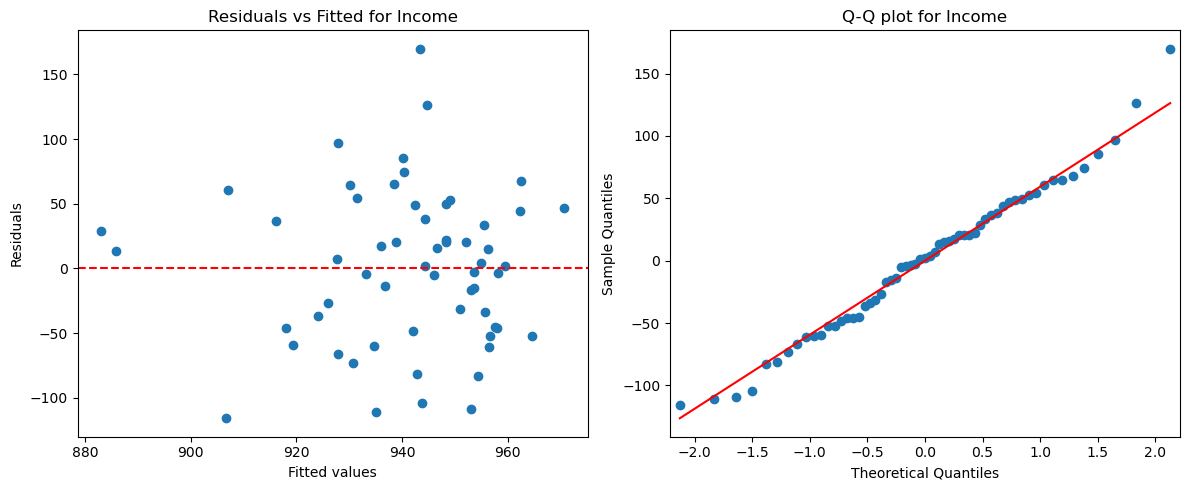

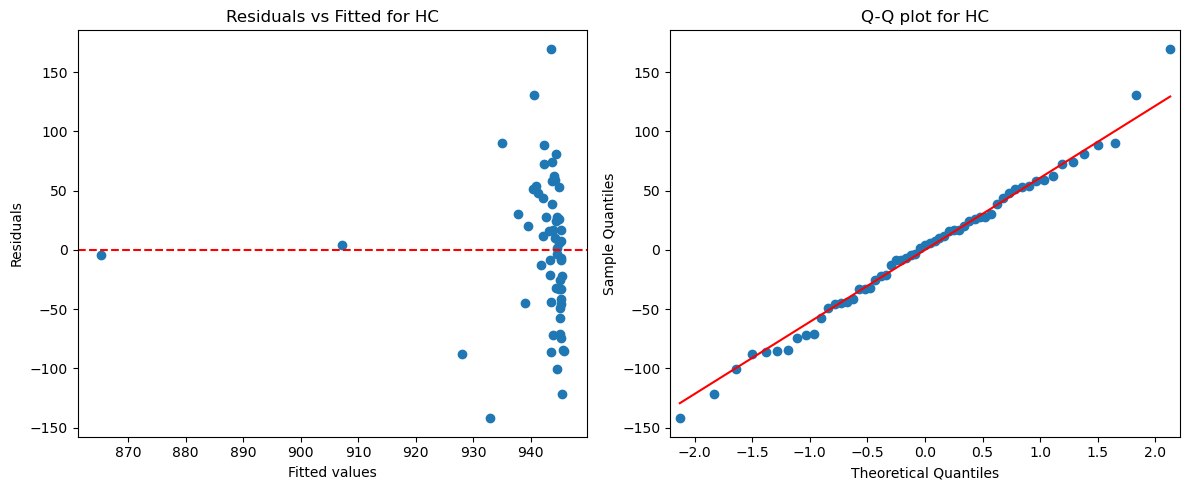

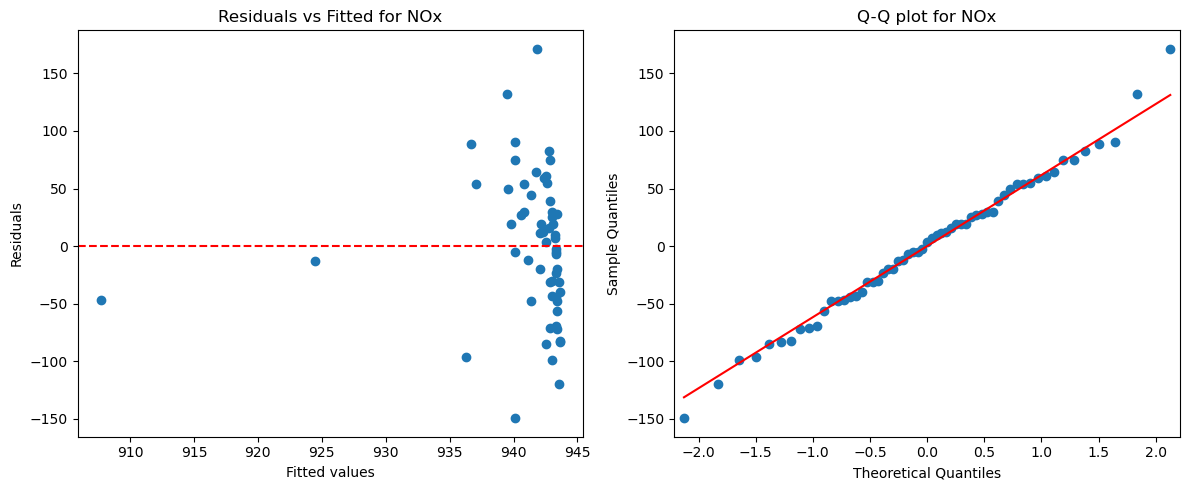

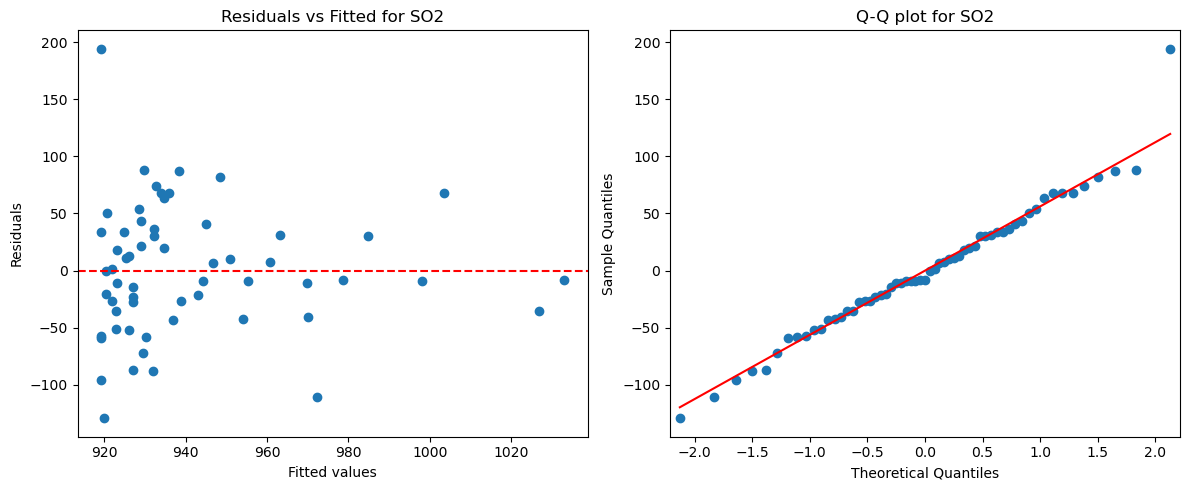

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\mortality.csv', index_col=0)

# Prepare the data
y = df['Mortality']
X = df.drop(columns=['Mortality'])

# Function to plot residuals and Q-Q plot for each variable
def plot_residuals_qq(variable, y, X):
    X_const = sm.add_constant(X[variable])
    model = sm.OLS(y, X_const).fit()
    residuals = model.resid
    
    # Plot residuals
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(model.fittedvalues, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Fitted for {variable}')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(f'Q-Q plot for {variable}')
    
    plt.tight_layout()
    plt.show()

# Analyze each variable
for variable in X.columns:
    plot_residuals_qq(variable, y, X)


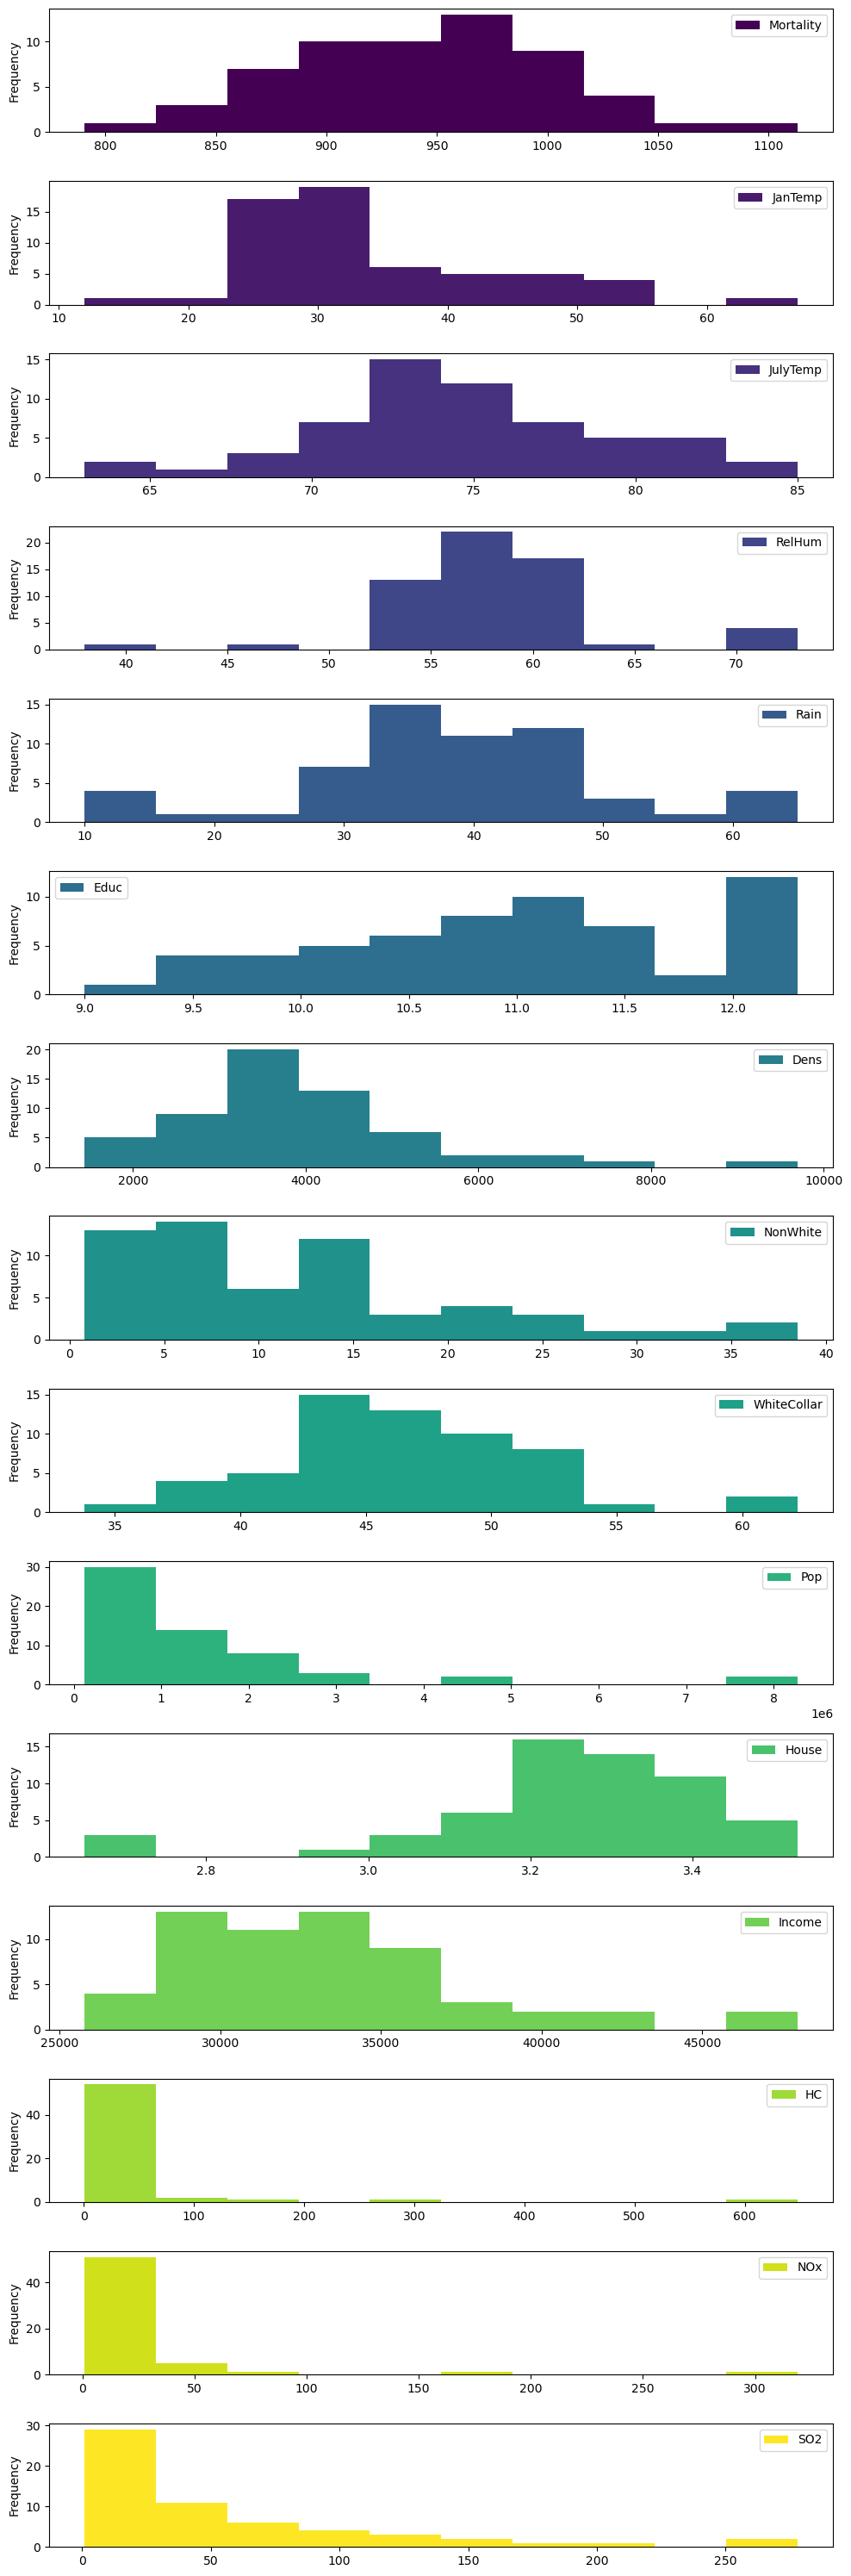

In [113]:
# Number of variables
num_vars = len(df.columns)

# Create subplots
fig, axs = plt.subplots(num_vars, figsize=(10, 2 * num_vars))  # Make figure longer

# Different colors for each histogram
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))

# Plot histograms
for idx, col in enumerate(df.columns):
    axs[idx].hist(df[col], bins=10, color=colors[idx], label=f"{col}")
    axs[idx].legend()
    axs[idx].set_ylabel('Frequency')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()